# Análise dos dados que serão utilizados

## Importando as bibliotecas necessárias para a exploração

Para fazer a análise dos dados dos crypto ativos, importei a biblioteca "yfinance" que recebe dados da API do YahooFinance, o datetime para fazer processamento de datas e o matplotlib para vizualizar a análise

In [1]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

## Etherium

Como são dois crypto ativos, eu selecionei o Etherium como o primeiro, recebendo todos os dados que a API fornece com intervalos de 1 minuto

In [2]:
eth = yf.Ticker("ETH-USD")
end_date = datetime.now().strftime('%Y-%m-%d')
df = eth.history(period='max',end=end_date, interval='1m')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-09-17 00:00:00+00:00,2295.295654,2295.295654,2295.295654,2295.295654,0,0.0,0.0
2024-09-17 00:01:00+00:00,2294.682373,2294.682373,2294.682373,2294.682373,0,0.0,0.0
2024-09-17 00:02:00+00:00,2294.441406,2294.441406,2294.441406,2294.441406,0,0.0,0.0
2024-09-17 00:03:00+00:00,2295.823486,2295.823486,2295.823486,2295.823486,0,0.0,0.0
2024-09-17 00:04:00+00:00,2296.619385,2296.619385,2296.619385,2296.619385,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-23 23:54:00+00:00,2647.475586,2647.475586,2647.475586,2647.475586,0,0.0,0.0
2024-09-23 23:55:00+00:00,2647.793945,2647.793945,2647.793945,2647.793945,0,0.0,0.0
2024-09-23 23:56:00+00:00,2648.343018,2648.343018,2648.343018,2648.343018,86016,0.0,0.0


Depois de receber o modelo como um DataFrame de pandas, eu utilizei o método 'info()' para verificar se há dados nulos e o método 'value_counts()' nas colunas 'Dividends' e 'Stock Splits' pois notei que hávia muitos 0 nestas colunas e quis verificar caso este seja o único valor nas colunas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9312 entries, 2024-09-17 00:00:00+00:00 to 2024-09-23 23:58:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          9312 non-null   float64
 1   High          9312 non-null   float64
 2   Low           9312 non-null   float64
 3   Close         9312 non-null   float64
 4   Volume        9312 non-null   int64  
 5   Dividends     9312 non-null   float64
 6   Stock Splits  9312 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 582.0 KB


In [4]:
df["Dividends"].value_counts()

Dividends
0.0    9312
Name: count, dtype: int64

In [5]:
df["Stock Splits"].value_counts()

Stock Splits
0.0    9312
Name: count, dtype: int64

Como a diferença de tempo entre duas linhas consecultivas é de um minuto, os valores de "Open" (valor no início do período), "High" (o valor mais alto do período), "Low" (o valor mais baixo do período) e "Close" (valor no início do período) são iguais pois os dados são atualizados por minuto. Assim, eu removi as colunas apenas com 0 ("Dividends" e "Stock Splits"), removi as colunas iguais, deixando apenas a "Close" que eu renomeei para "Value" e normalizei os dados tanto da coluna "Value" e "Volume" (o número de transações feitas no período)

In [6]:
df = df.drop(columns=["Dividends","Stock Splits","High","Low","Open"])
df = df.rename(columns={"Close":"Value"})
df["Value"] = (df["Value"] - df["Value"].min()) / (df["Value"].max() - df["Value"].min())
df["Volume"] = (df["Volume"] - df["Volume"].min()) / (df["Volume"].max() - df["Volume"].min())
df

,Value,Volume
Datetime,,
2024-09-17 00:00:00+00:00,0.071187,0.000000
2024-09-17 00:01:00+00:00,0.069779,0.000000
2024-09-17 00:02:00+00:00,0.069226,0.000000
2024-09-17 00:03:00+00:00,0.072399,0.000000
2024-09-17 00:04:00+00:00,0.074226,0.000000
...,...,...
2024-09-23 23:54:00+00:00,0.879708,0.000000
2024-09-23 23:55:00+00:00,0.880439,0.000000
2024-09-23 23:56:00+00:00,0.881700,0.000314


Tendo normalizado os valores, utilizei o matplotlib para vizualizar em um gráfico de linhas tanto o "Value" (linha laranja) no período de tempo quanto o "Volume" (linha azul)

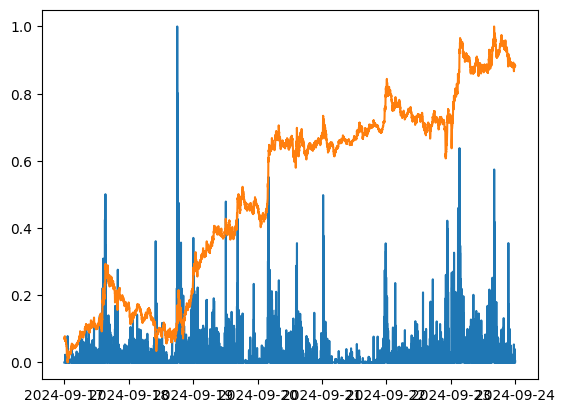

In [7]:
plt.plot(df.index,df["Volume"])
plt.plot(df.index,df["Value"])
plt.show()

## Bitcoin

Após a análise dos dados de Etherium, decidi utilizar o Bitcoin como segundo crypto ativo e fiz a mesma análise

In [8]:
btc = yf.Ticker("BTC-USD")
end_date = datetime.now().strftime('%Y-%m-%d')
df1 = btc.history(period='max',end=end_date, interval='1m')
df1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-09-17 00:00:00+00:00,58204.093750,58204.093750,58204.093750,58204.093750,0,0.0,0.0
2024-09-17 00:02:00+00:00,58190.289062,58190.289062,58190.289062,58190.289062,0,0.0,0.0
2024-09-17 00:03:00+00:00,58226.816406,58226.816406,58226.816406,58226.816406,0,0.0,0.0
2024-09-17 00:04:00+00:00,58249.835938,58249.835938,58249.835938,58249.835938,0,0.0,0.0
2024-09-17 00:05:00+00:00,58260.316406,58260.316406,58260.316406,58260.316406,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-23 23:53:00+00:00,63327.683594,63327.683594,63327.683594,63327.683594,3383296,0.0,0.0
2024-09-23 23:54:00+00:00,63322.550781,63322.550781,63322.550781,63322.550781,0,0.0,0.0
2024-09-23 23:55:00+00:00,63327.511719,63327.511719,63327.511719,63327.511719,0,0.0,0.0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8424 entries, 2024-09-17 00:00:00+00:00 to 2024-09-23 23:57:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          8424 non-null   float64
 1   High          8424 non-null   float64
 2   Low           8424 non-null   float64
 3   Close         8424 non-null   float64
 4   Volume        8424 non-null   int64  
 5   Dividends     8424 non-null   float64
 6   Stock Splits  8424 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 526.5 KB


In [10]:
df1["Dividends"].value_counts()

Dividends
0.0    8424
Name: count, dtype: int64

In [11]:
df1["Stock Splits"].value_counts()

Stock Splits
0.0    8424
Name: count, dtype: int64

In [12]:
df1 = df1.drop(columns=["Dividends","Stock Splits","High","Low","Open"])
df1 = df1.rename(columns={"Close":"Value"})
df1["Value"] = (df1["Value"] - df1["Value"].min()) / (df1["Value"].max() - df1["Value"].min())
df1["Volume"] = (df1["Volume"] - df1["Volume"].min()) / (df1["Volume"].max() - df1["Volume"].min())
df1

,Value,Volume
Datetime,,
2024-09-17 00:00:00+00:00,0.079089,0.000000
2024-09-17 00:02:00+00:00,0.077142,0.000000
2024-09-17 00:03:00+00:00,0.082294,0.000000
2024-09-17 00:04:00+00:00,0.085541,0.000000
2024-09-17 00:05:00+00:00,0.087019,0.000000
...,...,...
2024-09-23 23:53:00+00:00,0.801716,0.004899
2024-09-23 23:54:00+00:00,0.800993,0.000000
2024-09-23 23:55:00+00:00,0.801692,0.000000


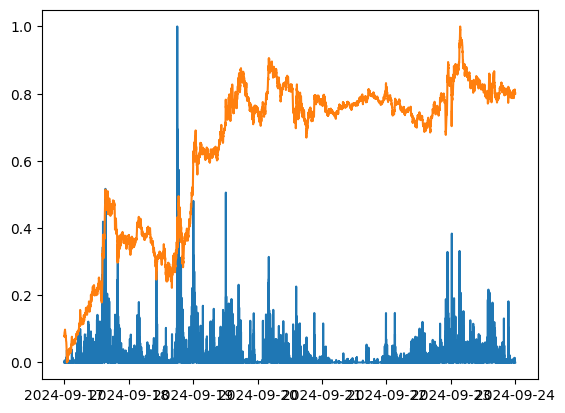

In [13]:
plt.plot(df1.index,df1["Volume"])
plt.plot(df1.index,df1["Value"])
plt.show()

## Conclusão

Fazendo a análise dos gráficos, consigo concluir que para saber se devo fazer a venda, a compra ou esperar eu devo analisar caso o preço está em um pico ou em um vale e analizar caso o valor normalizado do volume de transações é menor que 0.1 ou maior que 0.2 e o modelo que faz a previsão deve "entender" que as informações de input são uma sequência tempora. Portanto, para resolver o problema, eu fiz o criador modelo (modelCreator.py) o qual treina um modelo com camadas LSTM que recebe 60 minutos de dado e prevê o preço no próximo minuto, com a previsão no backend da aplicação, há um algoritmo simples que retorna o que deve ser feito com o crypto ativo.